In [1]:
import os
import json
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import cv2 #필요한 라이브러리 
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import time
import math
import pandas as pd
from tqdm.notebook import tqdm

import skimage
from skimage.morphology import skeletonize
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [5]:
'''
/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test
/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train
Ariel_Sharon
Colin_Powell
Donald_Rumsfeld
George_W_Bush
Gerhard_Schroeder
Hugo_Chavez
Tony_Blair
'''

'\n/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test\n/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train\nAriel_Sharon\nColin_Powell\nDonald_Rumsfeld\nGeorge_W_Bush\nGerhard_Schroeder\nHugo_Chavez\nTony_Blair\n'

EDA

In [6]:
traina = pd.DataFrame({'Ariel': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Ariel_Sharon/*'))})
trainc = pd.DataFrame({'Colin': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Colin_Powell/*'))})
traind = pd.DataFrame({'Donald': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Donald_Rumsfeld/*'))})
trainw = pd.DataFrame({'George': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/George_W_Bush/*'))})
trains = pd.DataFrame({'Gerhard': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Gerhard_Schroeder/*'))})
trainh = pd.DataFrame({'Hugo': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Hugo_Chavez/*'))})
traint = pd.DataFrame({'Tony': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/train/Tony_Blair/*'))})

In [7]:
traina # Ariel_Sharon를 담은 데이터 프레임 

,Ariel
0,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
1,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
2,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
3,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
4,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
...,...
59,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
60,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
61,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...
62,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...


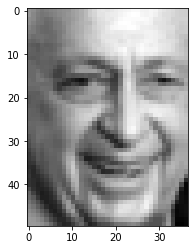

In [8]:
img = cv2.imread(traina['Ariel'][0], 0)
plt.imshow(img, cmap='gray')

In [9]:
img.shape

(50, 37)

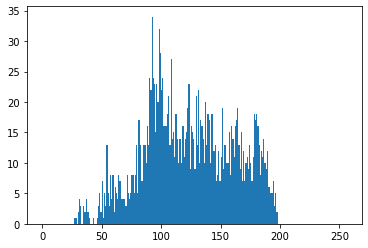

In [10]:
#EDA1 이미지 히스토그램 방법1
plt.hist(img.ravel(), 256, [0,256]); 
plt.show()

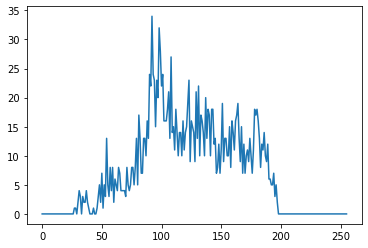

In [11]:
#방법2 
hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

PCA - Ariel_Sharon만

In [12]:
# Ariel PCA 
from sklearn.preprocessing import StandardScaler
n_sample = 64
n_row = 50
n_col = 37
arial= []

for i in traina.index:
  img = cv2.imread(traina['Ariel'][i], 0)
  arial.append(img)

nparial = np.array(arial) 
nparial.shape

(64, 50, 37)

In [13]:
arialface = nparial.reshape(n_sample, n_row * n_col)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 32).fit(arialface)
x_train = pca.transform(arialface)

In [15]:
x_train.shape

(64, 32)

In [16]:
pca.components_.shape

(32, 1850)

In [17]:
print(pca.explained_variance_ratio_[:5])
print(sum(pca.explained_variance_ratio_))

[0.20973238 0.16502105 0.07518768 0.06681887 0.05109878]
0.9319494580885007


In [18]:
pca.components_[0]

array([ 0.00872672,  0.00818369,  0.00900507, ..., -0.02112437,
       -0.02967605, -0.03487957])

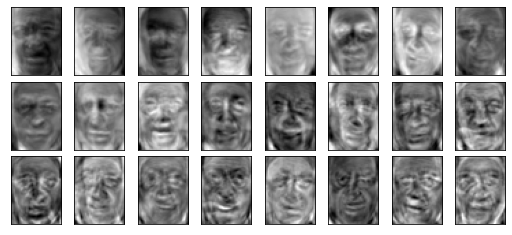

In [19]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(50, 37), cmap='gray')

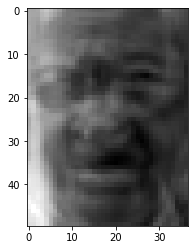

In [20]:
eigenfaces = pca.components_.reshape((32, n_row, n_col))
loadeigen = eigenfaces[0]
plt.imshow(loadeigen, cmap='gray')

In [21]:
# Ariel 정규화와 PCA 
n_sample = 64
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in traina.index:
  img = cv2.imread(traina['Ariel'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
x_train = pca.transform(arialface)


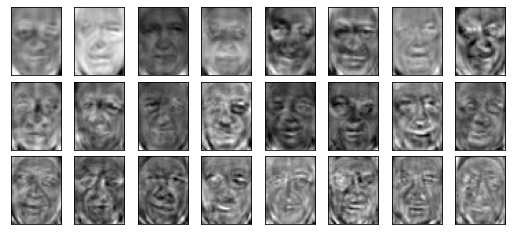

In [22]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(50, 37), cmap='gray')

In [23]:
print(pca.explained_variance_ratio_[:5])

[0.0862767  0.08157526 0.07420732 0.05814477 0.05222371]


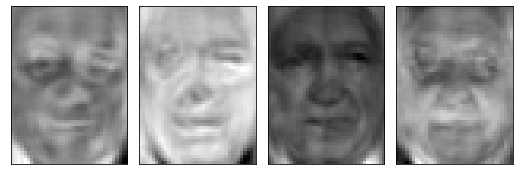

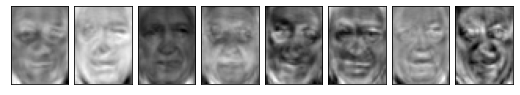

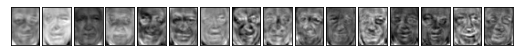

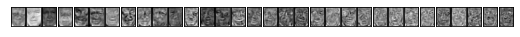

In [24]:
#여러개 n_components
n_sample = 64
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 
num_com = [4, 8, 16, 32, 64]

for i in traina.index:
  img = cv2.imread(traina['Ariel'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 


for n in num_com:
  arialface = nparial.reshape(n_sample, n_row * n_col)
  pca = PCA(n_components = n).fit(arialface)
  x_train = pca.transform(arialface)

  fig, axes = plt.subplots(1, n, figsize=(9, 4),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

  for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(50, 37), cmap='gray')

전체 PCA

In [25]:
# Ariel 정규화와 PCA 
n_sample = traina.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in traina.index:
  img = cv2.imread(traina['Ariel'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
a_train = pca.transform(arialface)

In [26]:
pca_a = pca.components_
pca_a

array([[-0.006993  , -0.01058979, -0.01417297, ..., -0.08729199,
        -0.11879618, -0.11556815],
       [ 0.01337266,  0.0276373 ,  0.02906644, ..., -0.12928891,
        -0.10900469, -0.08312075],
       [-0.00334502,  0.0039503 ,  0.01390249, ...,  0.12101168,
         0.07227505,  0.02554304],
       ...,
       [ 0.00618975, -0.00696179, -0.0353434 , ...,  0.02641958,
        -0.04708662, -0.04290996],
       [ 0.04689913,  0.03823029,  0.00931647, ..., -0.06468163,
         0.03586338,  0.1005905 ],
       [-0.03311321,  0.00175772,  0.01956668, ..., -0.00700592,
         0.02853289,  0.00291169]])

In [27]:
#Colin 정규화와 PCA 
n_sample = trainc.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in trainc.index:
  img = cv2.imread(trainc['Colin'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
c_train = pca.transform(arialface)

In [28]:
pca_c = pca.components_
pca_c

array([[-2.67060656e-02, -3.56212968e-02, -4.45913448e-02, ...,
        -1.07655623e-02,  6.96105374e-03,  1.80461277e-02],
       [ 3.69480308e-03, -6.94163254e-03, -5.05442588e-03, ...,
        -1.56880769e-01, -1.65157268e-01, -1.46339812e-01],
       [ 7.49481449e-03,  5.19480958e-03,  7.98869224e-03, ...,
         7.73531456e-02,  4.46154627e-05, -4.68769293e-02],
       ...,
       [ 4.41032403e-03, -8.90283907e-03, -4.89369446e-03, ...,
         2.87457136e-02,  5.04087311e-02,  7.34007423e-02],
       [-3.41146042e-02, -3.49544684e-02,  6.52560318e-03, ...,
        -3.85294092e-02, -7.82958197e-02, -8.30298576e-02],
       [-5.23526440e-02, -6.74800810e-02, -6.14329930e-02, ...,
         1.73052884e-02,  5.27503465e-02,  8.96880002e-02]])

In [29]:
#Donald_ 정규화와 PCA 
n_sample = traind.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in traind.index:
  img = cv2.imread(traind['Donald'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
d_train = pca.transform(arialface)

In [30]:
pca_d = pca.components_
pca_d

array([[ 0.00825787,  0.00634173,  0.00348729, ...,  0.1116865 ,
         0.07945933,  0.05677971],
       [-0.02019667, -0.0279527 , -0.03919935, ...,  0.04263622,
         0.0536653 ,  0.04277822],
       [-0.02287138, -0.02022448, -0.01838613, ..., -0.07811141,
        -0.07931524, -0.0590531 ],
       ...,
       [-0.01076228, -0.01537506, -0.02300374, ..., -0.01307088,
        -0.02123122, -0.02532311],
       [ 0.02839377,  0.0377031 ,  0.01470835, ...,  0.03563543,
        -0.01169667, -0.05597622],
       [ 0.02724204,  0.00201008, -0.03272114, ...,  0.01849951,
         0.01385646,  0.00699707]])

In [31]:
#George 정규화와 PCA 
n_sample = trainw.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in trainw.index:
  img = cv2.imread(trainw['George'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
w_train = pca.transform(arialface)

In [32]:
pca_g = pca.components_
pca_g

array([[ 0.01888928,  0.02872939,  0.03630204, ...,  0.07446196,
         0.05884904,  0.04224562],
       [-0.02117918, -0.02433968, -0.01957417, ..., -0.1265436 ,
        -0.12218803, -0.11060476],
       [-0.03376345, -0.03732119, -0.03956056, ...,  0.09028274,
         0.06879979,  0.04719327],
       ...,
       [-0.01234473,  0.00259111,  0.02050561, ...,  0.02106948,
        -0.00607221, -0.03614195],
       [ 0.01613519,  0.02009801,  0.0308119 , ..., -0.04674113,
        -0.00907772,  0.01335961],
       [-0.00035406, -0.02696949, -0.01345247, ...,  0.05226685,
         0.02727137, -0.04139493]])

In [33]:
#Gerhard 정규화와 PCA 
n_sample = trains.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in trains.index:
  img = cv2.imread(trains['Gerhard'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
s_train = pca.transform(arialface)

In [34]:
pca_s = pca.components_
pca_s

array([[-0.0206732 , -0.02165841, -0.02334355, ..., -0.07493453,
        -0.07675371, -0.06482372],
       [-0.03213387, -0.0352215 , -0.03519302, ...,  0.02563693,
         0.00372415, -0.01079754],
       [-0.0125381 , -0.03064629, -0.04306676, ...,  0.10420748,
         0.08862718,  0.07708661],
       ...,
       [-0.01079736,  0.00342029, -0.01318855, ..., -0.00809368,
        -0.01202522,  0.00878416],
       [ 0.01579191,  0.0193934 , -0.0091869 , ..., -0.05694055,
        -0.05494836, -0.00731452],
       [ 0.04470905,  0.02491183, -0.00383962, ...,  0.05274764,
         0.04084646, -0.05475703]])

In [35]:
#Hugo 정규화와 PCA 
n_sample = trainh.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in trainh.index:
  img = cv2.imread(trainh['Hugo'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
h_train = pca.transform(arialface)

In [36]:
pca_h = pca.components_
pca_h

array([[ 0.00218561,  0.00666344,  0.02078675, ...,  0.00746085,
         0.00385191,  0.00091487],
       [-0.0263849 , -0.02489775, -0.0280706 , ..., -0.03534769,
        -0.02756326, -0.01476878],
       [-0.00653855,  0.01005872,  0.0350057 , ...,  0.03977258,
         0.01257211,  0.00736562],
       ...,
       [-0.00617851, -0.00413954, -0.01616011, ...,  0.03060914,
         0.0335418 ,  0.02264614],
       [-0.01555249, -0.03688371, -0.0192385 , ...,  0.07027959,
        -0.01945143, -0.03446953],
       [ 0.02243638,  0.03619984,  0.04776437, ..., -0.04182437,
        -0.04561811, -0.01907589]])

In [37]:
#Tony 정규화와 PCA 
n_sample = traint.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in traint.index:
  img = cv2.imread(traint['Tony'][i], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
t_train = pca.transform(arialface)

In [38]:
pca_t = pca.components_
pca_t

array([[-0.02904769, -0.04008914, -0.05483513, ..., -0.10435481,
        -0.0926077 , -0.07804322],
       [ 0.0041256 , -0.00426015, -0.00351839, ...,  0.03935148,
        -0.00561482, -0.02649897],
       [-0.00905751, -0.01236267, -0.00271769, ..., -0.0122302 ,
        -0.00571568,  0.01333075],
       ...,
       [ 0.01546002,  0.01793303,  0.03300639, ..., -0.00729691,
         0.02562525,  0.04029789],
       [ 0.00570218, -0.00558596,  0.02547252, ...,  0.00872032,
         0.0179253 ,  0.04620752],
       [-0.0031384 ,  0.00255695,  0.04428367, ...,  0.04311877,
         0.01563814,  0.00545711]])

In [39]:
'''
테스트 데이터셋, 라벨링 
Ariel_Sharon: 1
Colin_Powell: 2
Donald_Rumsfeld: 3
George_W_Bush: 4
Gerhard_Schroede:5r
Hugo_Chavez: 6
Tony_Blair:7
'''
testa = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Ariel_Sharon/*')), 'label': 1})
testc = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Colin_Powell/*')), 'label': 2})
testd = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Donald_Rumsfeld/*')), 'label': 3})
testw = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/George_W_Bush/*')), 'label': 4})
tests = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Gerhard_Schroeder/*')), 'label': 5})
testh = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Hugo_Chavez/*')), 'label': 6})
testt = pd.DataFrame({'path': sorted(glob('/content/gdrive/MyDrive/Colab Notebooks/생체보/pca_data1/test/Tony_Blair/*')), 'label': 7})

In [40]:
test = pd.concat([testa, testc, testd, testw, tests, testh, testt])
test

,path,label
0,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,1
1,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,1
2,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,1
3,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,1
4,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,1
...,...,...
31,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,7
32,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,7
33,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,7
34,/content/gdrive/MyDrive/Colab Notebooks/생체ᄇ...,7


In [41]:
n_sample = test.shape[0]
n_row = 50
n_col = 37
arial= []
scaler = StandardScaler() 

for i in test.index:
  img = cv2.imread(test.iloc[i][0], 0)
  img_scalar = scaler.fit_transform(img)
  arial.append(img_scalar)
nparial = np.array(arial) #넘파이로 바꿈 

arialface = nparial.reshape(n_sample, n_row * n_col)
pca = PCA(n_components = 32).fit(arialface)
test_pca = pca.transform(arialface)

In [42]:
test_pca.shape

(322, 32)

In [43]:
pca_test = pca.components_
pca_test

array([[-0.00906595, -0.019869  , -0.02781339, ...,  0.00621024,
        -0.01207971, -0.01885723],
       [ 0.03397488,  0.04263846,  0.04922579, ...,  0.05670134,
         0.03788779,  0.01283719],
       [ 0.0032875 ,  0.00872396,  0.00050431, ...,  0.11618869,
         0.10671092,  0.10353685],
       ...,
       [-0.07029185, -0.06742392, -0.04195319, ..., -0.03270833,
         0.02565288,  0.05228678],
       [ 0.03983099,  0.01335492, -0.02171848, ...,  0.04976092,
         0.01670556, -0.01438174],
       [ 0.01219741,  0.00982987, -0.0170761 , ...,  0.00676389,
         0.00201023, -0.04282276]])

매칭알고리즘 테스트용  

In [44]:
!pip uninstall opencv-python -y
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

  Using cached opencv_contrib_python-3.4.2.17-cp37-cp37m-manylinux1_x86_64.whl (30.6 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 3.4.2.17
    Uninstalling opencv-contrib-python-3.4.2.17:
      Successfully uninstalled opencv-contrib-python-3.4.2.17
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
imgaug 0.2.9 requires opencv-python, which is not installed.
dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
albumentations 

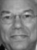

In [45]:
#cv2.imshow 함수를 cv2_imshow로 변경
from google.colab.patches import cv2_imshow
cv2_imshow(img)

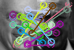

In [46]:
img1 = cv2.imread(traina['Ariel'][0], 0)
img2 = cv2.imread(traina['Ariel'][1], 0)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

#bf = cv2.BFMatcher_create()
#bf = cv2.BFMatcher()
#matches = bf.knnMatch(des1, des2, k=2)
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = matcher.match(des1, des2)

'''
good = []
for m, n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)'''

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(img3)

In [47]:
matches

[<DMatch 0x7f80e6c98e90>,
 <DMatch 0x7f80e6c98d90>,
 <DMatch 0x7f80e6c98d10>,
 <DMatch 0x7f80e6c98d50>,
 <DMatch 0x7f80e6c98d70>,
 <DMatch 0x7f80e6c98e70>,
 <DMatch 0x7f80e6c98df0>,
 <DMatch 0x7f80e6c98e10>,
 <DMatch 0x7f80e6c98dd0>,
 <DMatch 0x7f80e6c98e50>,
 <DMatch 0x7f80e6c98e30>,
 <DMatch 0x7f80e6c98eb0>,
 <DMatch 0x7f80e6c98ed0>,
 <DMatch 0x7f80e6c98f10>,
 <DMatch 0x7f80e6c98f30>,
 <DMatch 0x7f80e6c98f50>,
 <DMatch 0x7f80e6c98f70>,
 <DMatch 0x7f80e6c98f90>]

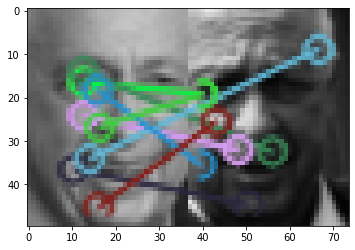

(<matplotlib.image.AxesImage at 0x7f80e6c12690>, None)

In [48]:
img1 = cv2.imread(traina['Ariel'][0], 0)
img2 = cv2.imread(traina['Ariel'][1], 0)

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=32)

matcher = cv2.FlannBasedMatcher(index_params, search_params)

matches = matcher.match(des1, des2)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3, 'gray'), plt.show()

In [49]:
matches

[<DMatch 0x7f80e73525b0>,
 <DMatch 0x7f80e6c62290>,
 <DMatch 0x7f80e6c62350>,
 <DMatch 0x7f80e6c62050>,
 <DMatch 0x7f80e6c62150>,
 <DMatch 0x7f80e6c622b0>,
 <DMatch 0x7f80e6c62070>,
 <DMatch 0x7f80e6c621d0>,
 <DMatch 0x7f80e6c621b0>,
 <DMatch 0x7f80e6c62130>,
 <DMatch 0x7f80e6c62230>,
 <DMatch 0x7f80e6c62090>,
 <DMatch 0x7f80e6c62170>,
 <DMatch 0x7f80e6c621f0>,
 <DMatch 0x7f80e6c620d0>,
 <DMatch 0x7f80e6c62250>,
 <DMatch 0x7f80e6c62270>,
 <DMatch 0x7f80e6c622d0>,
 <DMatch 0x7f80e6c622f0>,
 <DMatch 0x7f80e6c62310>,
 <DMatch 0x7f80e6c62330>,
 <DMatch 0x7f80e6c62370>,
 <DMatch 0x7f80e6c62390>,
 <DMatch 0x7f80e6c623b0>,
 <DMatch 0x7f80e6c623d0>,
 <DMatch 0x7f80e6c623f0>,
 <DMatch 0x7f80e6c62410>,
 <DMatch 0x7f80e6c62430>]

In [50]:
img.shape

(50, 37)

매칭 - BMFMatcher

In [51]:
img = cv2.imread(test.iloc[i][0], 0)
img

array([[ 83,  88,  97, ..., 118, 133, 137],
       [ 87,  91,  98, ..., 112, 125, 134],
       [ 86,  90,  96, ..., 104, 112, 121],
       ...,
       [ 10,   9,   7, ...,  83, 120, 200],
       [  9,   9,   7, ...,  91, 134, 199],
       [  5,   6,   7, ..., 100, 146, 196]], dtype=uint8)

In [52]:
np.uint8(a_train)

array([[ 10,  12,   0, ...,   1,   7, 254],
       [  7, 247,   0, ..., 254, 255,   5],
       [247,   6, 249, ...,   0,   0, 254],
       ...,
       [248,  20, 248, ...,   0,   2, 252],
       [  6, 253, 252, ..., 254,   2, 255],
       [242,   2,   2, ...,   1, 254, 252]], dtype=uint8)

In [53]:
np_pred = []
np_true = []

for i in test.index: #모든 테스트 데이터셋에 대해서 
  label = test.iloc[i][1]
  np_true.append(label)
  img = cv2.imread(test.iloc[i][0], 0)  #pca를 하지 않은 테스트 이미지 
  distance = []

  sift = cv2.xfeatures2d.SIFT_create()
  kp1, des1 = sift.detectAndCompute(img, None)
  kp2, des2 = sift.detectAndCompute(np.uint8(a_train), None)  #a_train 
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(c_train), None) #c_train
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(d_train), None) #d_train
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(s_train), None) #s_train 
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(w_train), None) #w_train 
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(h_train), None) #h_train
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(t_train), None) #t_train
  
  matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  min_idx = distance.index(min(distance))
  np_pred.append(min_idx+1)
  

In [54]:
np_pred

[1,
 7,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 7,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 7,
 6,
 7,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 6,
 7,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 7,
 1,
 6,
 4,
 1,
 7,
 1,
 1,
 6,
 6,
 4,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 7,
 1,
 1,
 7,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 7,
 6,
 7,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 6,
 7,
 1,
 4,
 1,
 7,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 7,
 6,
 7,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 6,
 7,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 7,
 1,
 6,
 4,
 1,
 7,
 1,
 1,
 6,
 6,
 4,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 7,
 1,
 7,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 7,
 1,
 1,
 1,
 1,
 7,
 7,
 6,
 6,
 1,
 7,
 7,
 1,
 6,
 7,
 7,
 1,
 1,
 1,
 7,
 6,
 1,
 1,
 7,
 7,
 7,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 7,
 1,
 1,
 7,
 1,
 6,
 1,
 7,
 7,
 6,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 7,
 4,
 1,
 6,
 1,
 1,
 7,
 1,
 1,


매칭2 - FlannBasedMatcher

In [55]:
np_pred2 = []
np_true = []

for i in test.index: #모든 테스트 데이터셋에 대해서 
  label = test.iloc[i][1]
  np_true.append(label)
  img = cv2.imread(test.iloc[i][0], 0)  #pca를 하지 않은 테스트 이미지 
  distance = []

  sift = cv2.xfeatures2d.SIFT_create()
  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
  search_params = dict(checks=32) 
  kp1, des1 = sift.detectAndCompute(img, None)
  kp2, des2 = sift.detectAndCompute(np.uint8(a_train), None)  #a_train 
  
  matcher = cv2.FlannBasedMatcher(index_params, search_params)
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(c_train), None) #c_train
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(d_train), None) #d_train
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(s_train), None) #s_train 
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(w_train), None) #w_train 
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(h_train), None) #h_train
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  kp2, des2 = sift.detectAndCompute(np.uint8(t_train), None) #t_train
  matches = matcher.match(des1, des2)
  matches = sorted(matches, key=lambda x: x.distance)
  sum_distance = sum(x.distance for x in matches)
  distance.append(sum_distance)

  min_idx = distance.index(min(distance))
  np_pred2.append(min_idx+1)

In [56]:
np_pred2

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 2,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 2,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 2,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


매트릭스 계산 

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

In [58]:
conf_mat = confusion_matrix(np_true, np_pred)
conf_mat

array([[70,  0,  0,  0,  0, 21],
       [97,  0,  0,  8, 28, 25],
       [16,  0,  0,  0,  2,  9],
       [26,  0,  0,  1,  5, 14],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

In [59]:
precision = precision_score(np_true, np_pred, average='micro')
recall = recall_score(np_true, np_pred, average='micro')
print(precision, recall)

0.2204968944099379 0.2204968944099379


In [60]:
conf_mat.sum()

322

In [61]:
tp_sum = conf_mat.diagonal().sum()
fp_sum = conf_mat.sum() - tp_sum
fn_sum = conf_mat.sum() - tp_sum
tn_sum = (len(conf_mat)-2) * conf_mat.sum() * tp_sum 

In [62]:
FAR = fp_sum/conf_mat.sum()
FAR = fp_sum/(tn_sum+fp_sum)
FRR = fn_sum / (fn_sum+tp_sum)

In [63]:
print(FAR, FRR)

0.0027372163273318138 0.7795031055900621


본인얼굴 

In [ ]:

plt.imshow(img, cmap='gray')

In [ ]:
# 전처리 
img_cut = img[:50*5, : 37*5] 
img_re = cv2.resize(img_cut, (37, 50))
img_g = cv2.GaussianBlur(img_re, (3, 3), 0) 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_cl = clahe.apply(img_g)
plt.imshow(img_cl, cmap='gray')

In [ ]:
# 전처리 interpolation=cv2.INTER_AREA
img_cut = img[:50*5, : 37*5] 
img_re = cv2.resize(img_cut, (37, 50), interpolation=cv2.INTER_AREA)
img_g = cv2.GaussianBlur(img_re, (3, 3), 0) 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_cl = clahe.apply(img_g)
plt.imshow(img_cl, cmap='gray')

In [67]:
img = img_cl
distance = []

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img, None)
kp2, des2 = sift.detectAndCompute(np.uint8(a_train), None)  #a_train 
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)  
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(c_train), None) #c_train
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(d_train), None) #d_train
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(s_train), None) #s_train 
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(w_train), None) #w_train 
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(h_train), None) #h_train
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

kp2, des2 = sift.detectAndCompute(np.uint8(t_train), None) #t_train
matches = matcher.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
sum_distance = sum(x.distance for x in matches)
distance.append(sum_distance)

min_idx = distance.index(min(distance)) + 1
min_idx

1